In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df= pd.read_csv(r"D:\Excel R\Excel R Project\Beds_Occupied.csv")

In [6]:
df.head()

,collection_date,Total Inpatient Beds
0,15-06-2020,293
1,16-06-2020,295
2,17-06-2020,290
3,18-06-2020,291
4,19-06-2020,288


In [7]:
df.shape

(359, 2)

# Data Pre-Processing

#### 4 Business moments

In [8]:
df.mean()

Total Inpatient Beds    241.983287
dtype: float64

In [9]:
df.var()

Total Inpatient Beds    837.340502
dtype: float64

In [10]:
df.kurtosis()

Total Inpatient Beds   -0.60372
dtype: float64

In [11]:
df.skew()

Total Inpatient Beds    0.480804
dtype: float64

In [12]:
df.describe()

,Total Inpatient Beds
count,359.000000
mean,241.983287
std,28.936836
min,190.000000
25%,219.000000
50%,235.000000
75%,259.000000
max,341.000000


In [13]:
df.dtypes

collection_date         object
Total Inpatient Beds     int64
dtype: object

In [14]:
df.columns

Index(['collection_date', 'Total Inpatient Beds'], dtype='object')

In [15]:
len(df['Total Inpatient Beds'].unique())
# length of the unique values out of 359 
# that is the remaning 275 values are repeated .

84

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collection_date       359 non-null    object
 1   Total Inpatient Beds  359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [17]:
df.isnull().sum()

collection_date         0
Total Inpatient Beds    0
dtype: int64

In [18]:
len(df['Total Inpatient Beds'].values)

359

In [19]:
df.collection_date = pd.to_datetime(df.collection_date,format ="%d-%m-%Y")

In [20]:
df.set_index('collection_date',inplace =True)

In [21]:
df.index[0:5]

DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19'],
              dtype='datetime64[ns]', name='collection_date', freq=None)

In [22]:
df.dtypes

Total Inpatient Beds    int64
dtype: object

In [23]:
df.head

<bound method NDFrame.head of                  Total Inpatient Beds
collection_date                      
2020-06-15                        293
2020-06-16                        295
2020-06-17                        290
2020-06-18                        291
2020-06-19                        288
...                               ...
2021-06-11                        312
2021-06-12                        212
2021-06-13                        299
2021-06-14                        202
2021-06-15                        220

[359 rows x 1 columns]>

In [24]:
## here we are indexing we acces the time series by using the index 

In [25]:
dt = pd.date_range("06-15-2020","06-15-2021")
idx = pd.DatetimeIndex(dt)
df= df.reindex(idx)

In [26]:
pd.set_option('display.max_rows', df.shape[0]+1) # Here we have NaN values we need to impute these values
print(df)

            Total Inpatient Beds
2020-06-15                 293.0
2020-06-16                 295.0
2020-06-17                 290.0
2020-06-18                 291.0
2020-06-19                 288.0
2020-06-20                 289.0
2020-06-21                 277.0
2020-06-22                 289.0
2020-06-23                 292.0
2020-06-24                 293.0
2020-06-25                 291.0
2020-06-26                 282.0
2020-06-27                 283.0
2020-06-28                 284.0
2020-06-29                 194.0
2020-06-30                 292.0
2020-07-01                 275.0
2020-07-02                 290.0
2020-07-03                 287.0
2020-07-04                 283.0
2020-07-05                 282.0
2020-07-06                 284.0
2020-07-07                 291.0
2020-07-08                 292.0
2020-07-09                 294.0
2020-07-10                 287.0
2020-07-11                 284.0
2020-07-12                 282.0
2020-07-13                 292.0
2020-07-14

In [27]:
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",df.isna().sum())
print("The length of the data",len(df))
print("Total  Unique dates as index column",df.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    7
dtype: int64
The length of the data 366
Total  Unique dates as index column 366


In [28]:
#bfill()==> 207 as nan values
#ffill()==> 213 as the Nan Values
#interpolate ==> method ==linear we got nan value as 213,[211,210,209,208],207
#interpolate ==> method ==pad we got nan value as 213,
#interpolate ==> method ==index we got nan value as 213, keep decreasing

#interpolate ==> method ==barycentric we got nan value as 213,


# using the Forward-fill Missing values
df1 =df.interpolate(method ='time')
df1

,Total Inpatient Beds
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
2020-06-20,289.0
2020-06-21,277.0
2020-06-22,289.0
2020-06-23,292.0
2020-06-24,293.0


In [29]:
df1['Total Inpatient Beds'].std(),df1['Total Inpatient Beds'].mean()

(28.907901436743185, 241.46994535519124)

In [30]:
upper_limit =df1['Total Inpatient Beds'].mean() +2 * df1['Total Inpatient Beds'].std()
print(upper_limit)# above the value 299 is considered as outlier

lower_limit =df1['Total Inpatient Beds'].mean() -2 * df1['Total Inpatient Beds'].std()
print(lower_limit)# below the value 183 is considered as Outlier

299.2857482286776
183.65414248170487


In [31]:
#outliers 
out_liers =df1[(df1['Total Inpatient Beds'] > upper_limit) | (df1['Total Inpatient Beds'] < lower_limit)]
out_liers

,Total Inpatient Beds
2020-07-16,341.0
2021-06-10,322.0
2021-06-11,312.0


# Removing the  Outliers

In [32]:
data =df1[(df1['Total Inpatient Beds'] < upper_limit) & (df1['Total Inpatient Beds'] > lower_limit)]
data

,Total Inpatient Beds
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
2020-06-20,289.0
2020-06-21,277.0
2020-06-22,289.0
2020-06-23,292.0
2020-06-24,293.0


In [33]:
# Check Again for NaN values
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",data.isna().sum())
print("The length of the data",len(data))
print("Total  Unique dates as index column",data.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    0
dtype: int64
The length of the data 363
Total  Unique dates as index column 363


# Data Visualization 

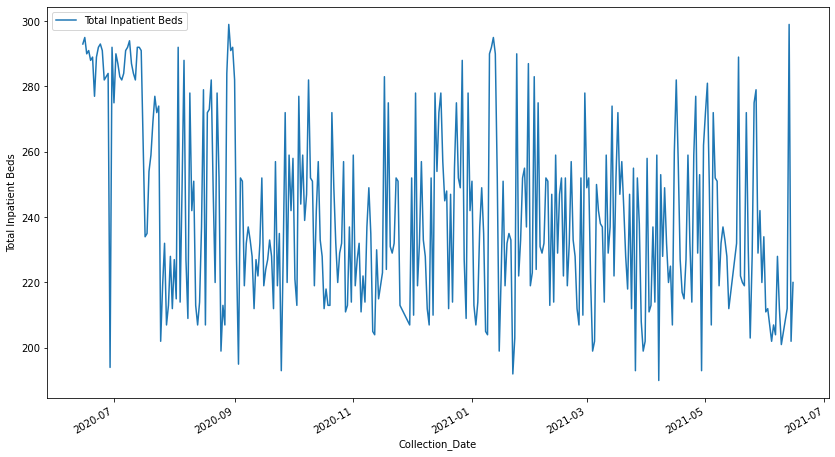

In [34]:
#line PLot of Time Series
rk = data.plot.line(figsize=(14,8))
rk.set_xlabel('Collection_Date')
rk.set_ylabel('Total Inpatient Beds');
# From the plot we can see that the data is stationary.
#the X- axis contains the Time Series variable (collection date)
# the Y-axis contains the Random variable (Total In patient Beds) value ranges from 150-350
# the 

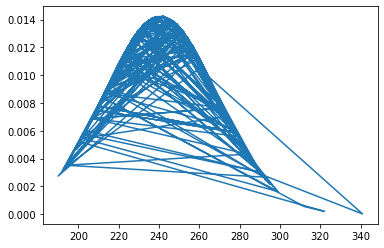

In [35]:
#Normal Distribution
from scipy.stats import norm
import statistics
mean =statistics.mean(data['Total Inpatient Beds'])
std =statistics.stdev(data['Total Inpatient Beds'])

#plt.figsize =(14,10)
plt.plot(df1['Total Inpatient Beds'], norm.pdf(df1['Total Inpatient Beds'], mean, std))
plt.show()
# from this normal distributin we can clearly say that they are two Outliers in the Data  320, and 340
# this is  one of the reason that we are getting for higher variane value =  837.340502 because of the data is spread from 190 to 340
# 320 & 340 (because these two data points in the data is been widely spreaded)

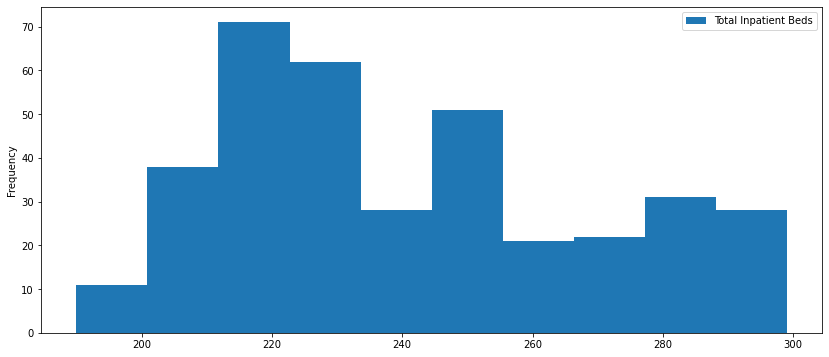

In [36]:
#Histogram Plot
rk1 =data.plot(kind="hist",figsize =(14,6),fontsize =10)
plt.show()

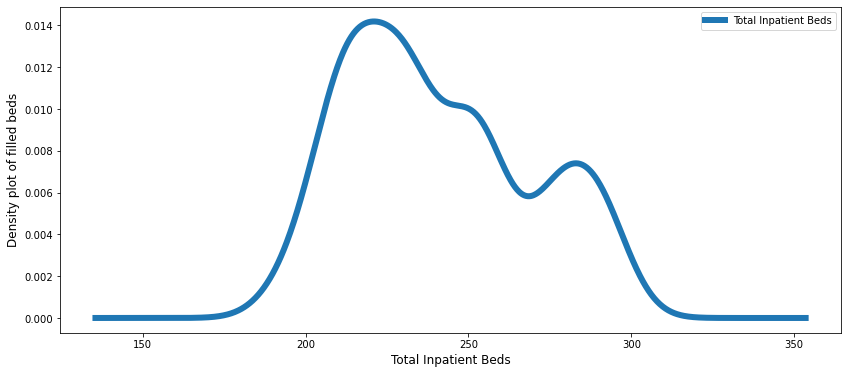

In [37]:
rk2 =data.plot(kind="density",figsize =(14,6),fontsize =10,linewidth=6)
rk2.set_xlabel("Total Inpatient Beds",fontsize =12)
rk2.set_ylabel("Density plot of filled beds",fontsize =12)
plt.show()

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Inpatient Beds'>

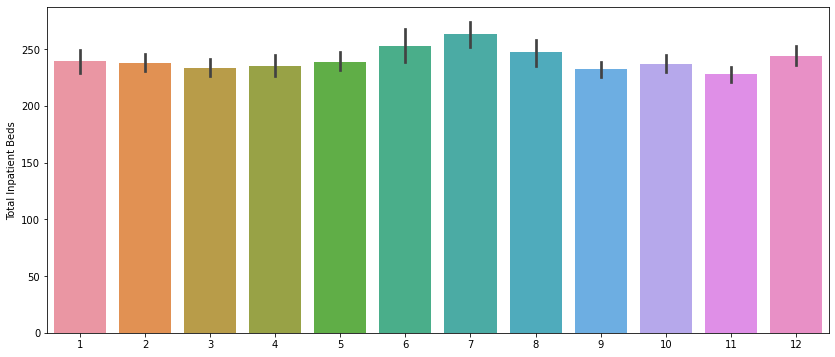

In [38]:
fig, rk4 = plt.subplots(figsize=(14,6))
sns.barplot(data.index.month,
            data['Total Inpatient Beds'], 
            ax =rk4,
            linewidth =4)


C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Inpatient Beds'>

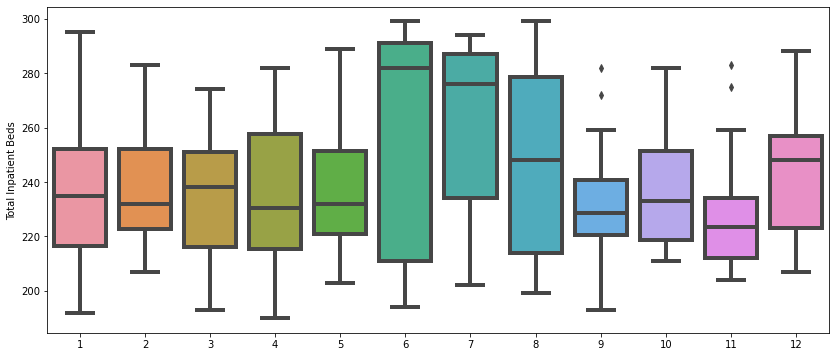

In [39]:
fig, rk3 = plt.subplots(figsize=(14,6))
sns.boxplot(data.index.month,
            data['Total Inpatient Beds'], 
            ax =rk3,
            linewidth =4)

In [40]:
X=data['Total Inpatient Beds'].values
split   =  round(len(X)/2)
X1, X2 =X[0:split],X[split:]
mean1 =X1.mean()
mean2 =X2.mean()
var1 =X1.var()
var2 =X2.var()
print("The Mean  and Variance of 1st half is ",mean1,var1)
print("The Mean  and Variance of 2nd half is ",mean2,var2)
## Here the Mean and variance are  Almost Constant

The Mean  and Variance of 1st half is  244.77472527472528 891.1921084410096
The Mean  and Variance of 2nd half is  236.76243093922653 637.8827874607002


# Checking For Stationary 

In [41]:
# Hypothisis Testing checking for the Stationary or NOt
from statsmodels.tsa.stattools import adfuller
x=data['Total Inpatient Beds'].values
result= adfuller(x)
#print(result)
print('ADF Statistic: %.3f' % result[0])
print("The P-Value:",result[1])
#print('p-value: %.f' % result[1])
print("Lags- Used: %.f" % result[2])
print("The number of Observarions Used is %3.f"% result[3])
print('Critical Values:')
#print("The P-Value:",result[1])
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
#The Intuation of Dicky Fuller Test 
#Here the Critical value is Less than 5% , thus the Time Series is Stationary with the 95% confidence

ADF Statistic: -5.575
The P-Value: 1.4367565029913304e-06
Lags- Used: 4
The number of Observarions Used is 358
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Hence the Critical values are less than 5% , Thus the time Series is Stationary with the Confidence of 95% 

In [42]:
# Creating the model
split_point =len(data) -10;
dataset,validation =data[0:split_point],data[split_point:]
print("Dataset %d,Validation %d" %(len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header =False)
validation.to_csv('validation.csv',header=False)


Dataset 353,Validation 10


Base Model / Persistance Model

In [43]:
from statsmodels.tsa.stattools import acf, pacf

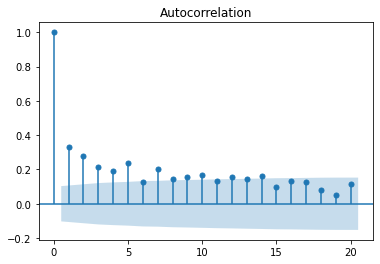

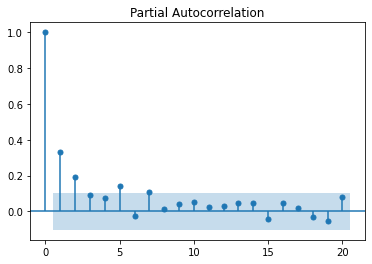

In [44]:
##ACF plots 
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(data['Total Inpatient Beds'],lags=20)
plt.show()

#PACF Plots
from statsmodels.graphics.tsaplots import plot_pacf
#df= pd.read_csv(r"C:\Users\RaviKiran\OneDrive\Desktop\Data Science\Data Sets\daily-minimum-temperatures.csv", header=0, index_col=0)
plot_pacf(data,lags= 20)# -1 to +1
plt.show()

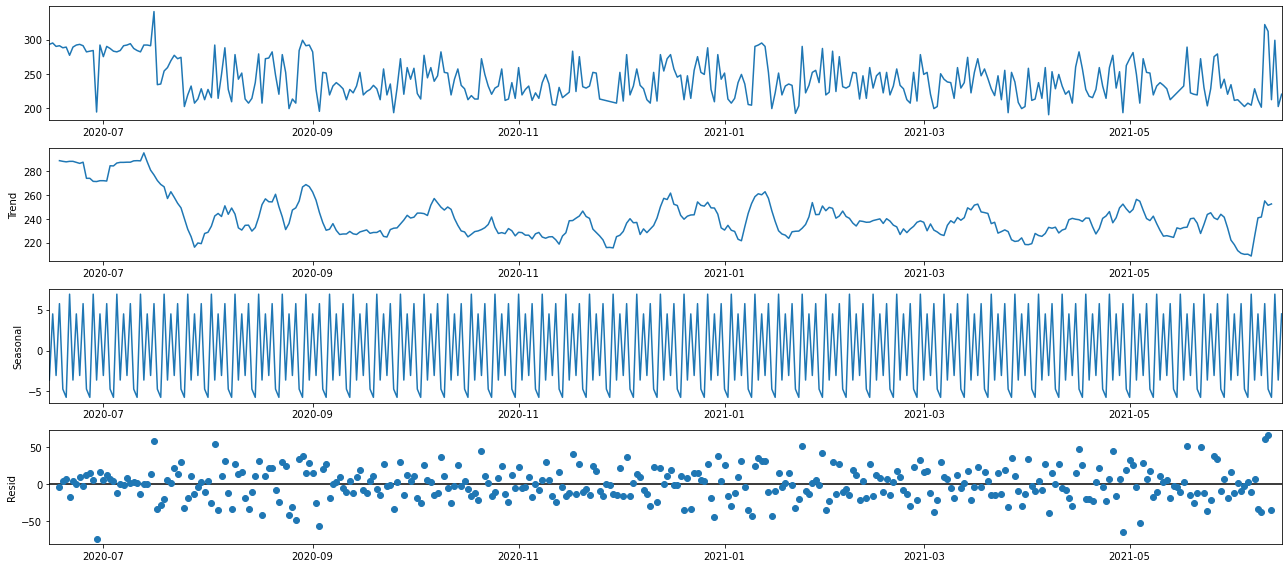

In [45]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()
# we can see that the series is stationary

lets Explore the Data Set in detail like Extracting the month and year from the dataset

 here i created extra  data frame called df1==> which contains collection_data,Total Inpatient Beds,and months
    from df==> dataframe we have all the columns as df1 in eddtion to year 

In [46]:
#df1=pd.DataFrame(data=df,columns =['collection_date','Total Inpatient Beds'])
#df['collection_date']=df['collection_date'].astype("str")
#df1['month']=0;

# import date time module
#from datetime import datetime
#for i in range(359):
    #x = df1['collection_date'][i]
    #df1['month'][i]=x[3:5]

In [47]:
#df['year']= 0;
#for j in range(359):
    #y =df['collection_date'][j]
    #df['year'][j]=y[6:]

AFTER DEALING WITH THE OUT LIERS

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data =pd.read_csv(r"D:\Excel R\Excel R Project\Beds_Occupied.csv")

In [50]:
data

,collection_date,Total Inpatient Beds
0,15-06-2020,293
1,16-06-2020,295
2,17-06-2020,290
3,18-06-2020,291
4,19-06-2020,288
5,20-06-2020,289
6,21-06-2020,277
7,22-06-2020,289
8,23-06-2020,292
9,24-06-2020,293


In [51]:
data.shape

(359, 2)

In [52]:
data.collection_date = pd.to_datetime(data.collection_date,format ="%d-%m-%Y")

In [53]:
data.set_index('collection_date',inplace =True)

In [54]:
dt = pd.date_range("06-15-2020","06-15-2021")
idx = pd.DatetimeIndex(dt)
df= data.reindex(idx)

In [55]:
pd.set_option('display.max_rows', df.shape[0]+1) # Here we have NaN values we need to impute these values
print(df)

            Total Inpatient Beds
2020-06-15                 293.0
2020-06-16                 295.0
2020-06-17                 290.0
2020-06-18                 291.0
2020-06-19                 288.0
2020-06-20                 289.0
2020-06-21                 277.0
2020-06-22                 289.0
2020-06-23                 292.0
2020-06-24                 293.0
2020-06-25                 291.0
2020-06-26                 282.0
2020-06-27                 283.0
2020-06-28                 284.0
2020-06-29                 194.0
2020-06-30                 292.0
2020-07-01                 275.0
2020-07-02                 290.0
2020-07-03                 287.0
2020-07-04                 283.0
2020-07-05                 282.0
2020-07-06                 284.0
2020-07-07                 291.0
2020-07-08                 292.0
2020-07-09                 294.0
2020-07-10                 287.0
2020-07-11                 284.0
2020-07-12                 282.0
2020-07-13                 292.0
2020-07-14

In [56]:
df.shape, len(df)

((366, 1), 366)

In [57]:
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",df.isna().sum())
print("The length of the data",len(df))
print("Total  Unique dates as index column",df.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    7
dtype: int64
The length of the data 366
Total  Unique dates as index column 366


In [58]:
df =data.interpolate(method ='time')
df

,Total Inpatient Beds
collection_date,
2020-06-15,293
2020-06-16,295
2020-06-17,290
2020-06-18,291
2020-06-19,288
2020-06-20,289
2020-06-21,277
2020-06-22,289
2020-06-23,292


In [59]:
df.shape,len(df)

((359, 1), 359)

In [60]:
upper_limit =df['Total Inpatient Beds'].mean() +1.9* df['Total Inpatient Beds'].std()
print(upper_limit)# above the value 299 is considered as outlier

lower_limit =df['Total Inpatient Beds'].mean() -1.9 * df['Total Inpatient Beds'].std()
print(lower_limit)# below the value 183 is considered as Outlier


296.9632761066486
187.00329770950736


In [61]:
#outliers 
out_liers =df[(df['Total Inpatient Beds'] > upper_limit) | (df['Total Inpatient Beds'] < lower_limit)]
out_liers

,Total Inpatient Beds
collection_date,
2020-07-16,341
2020-08-29,299
2021-06-10,322
2021-06-11,312
2021-06-13,299


In [62]:
data =df[(df['Total Inpatient Beds'] < upper_limit) & (df['Total Inpatient Beds'] > lower_limit)]
data

,Total Inpatient Beds
collection_date,
2020-06-15,293
2020-06-16,295
2020-06-17,290
2020-06-18,291
2020-06-19,288
2020-06-20,289
2020-06-21,277
2020-06-22,289
2020-06-23,292


In [63]:
data.shape,len(data)

((354, 1), 354)

In [64]:
354-39

315

In [65]:
Train =data.head(315)
Test =data.tail(39)

In [66]:
len(Test),len(Train)

(39, 315)

In [67]:
#AR model
import pmdarima as pm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [68]:
stepwise_fit =auto_arima(data['Total Inpatient Beds'],trace =True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3282.511, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3450.694, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3367.492, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3279.968, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3448.709, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3278.655, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3279.994, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3282.075, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3279.005, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3344.640, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3278.579, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3279.574, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3365.540, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3280.020, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [69]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  354
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1636.289
Date:                Tue, 24 Aug 2021   AIC                           3278.579
Time:                        19:23:44   BIC                           3290.178
Sample:                             0   HQIC                          3283.194
                                - 354                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1062      0.056      1.910      0.056      -0.003       0.215
ma.L1         -0.9024      0.024    -37.858      0.000      -0.949      -0.856
sigma2       619.3461     47.655     12.996      0.000     525.944     712.748
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 3.17
Prob(Q):                              0.83   Prob(JB):                         0.21
Heteroskedasticity (H):               0.81   Skew:                             0.23
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(Train['Total Inpatient Beds'],order=(1,1,1))
model=model.fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D.Total Inpatient Beds   No. Observations:                  314
Model:                     ARIMA(1, 1, 1)   Log Likelihood               -1457.906
Method:                           css-mle   S.D. of innovations             25.066
Date:                    Tue, 24 Aug 2021   AIC                           2923.812
Time:                            19:23:45   BIC                           2938.809
Sample:                                 1   HQIC                          2929.805
                                                                                  
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.1471      0.140     -1.049      0.294      -0.422       0.128
ar.L1.D.Total Inpatient Beds     0.1014      0.064      1.589      0.112      -0.024       0.226
ma.L1.D.Total Inpatient Beds    -0.9139      0.029    -31.964      0.000      -0.970      -0.858
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            9.8610           +0.0000j            9.8610            0.0000
MA.1            1.0942           +0.0000j            1.0942            0.0000
-----------------------------------------------------------------------------
"""

In [72]:
start1 =len(Train)
end1 =len(Train)+len(Test) -1
y_pred = model.predict(start =start1,end =end1,typ ='levels')
y_pred

314    242.253089
315    239.104308
316    238.652844
317    238.474915
318    238.324726
319    238.177349
320    238.030258
321    237.883195
322    237.736136
323    237.589076
324    237.442017
325    237.294958
326    237.147899
327    237.000840
328    236.853780
329    236.706721
330    236.559662
331    236.412603
332    236.265544
333    236.118484
334    235.971425
335    235.824366
336    235.677307
337    235.530247
338    235.383188
339    235.236129
340    235.089070
341    234.942011
342    234.794951
343    234.647892
344    234.500833
345    234.353774
346    234.206715
347    234.059655
348    233.912596
349    233.765537
350    233.618478
351    233.471419
352    233.324359
dtype: float64

In [73]:
# again seting the index to its date columns
y_pred.index =data.index[start1:end1+1]

In [74]:
y_pred

collection_date
2021-05-02    242.253089
2021-05-03    239.104308
2021-05-04    238.652844
2021-05-05    238.474915
2021-05-06    238.324726
2021-05-07    238.177349
2021-05-08    238.030258
2021-05-09    237.883195
2021-05-10    237.736136
2021-05-11    237.589076
2021-05-12    237.442017
2021-05-13    237.294958
2021-05-17    237.147899
2021-05-18    237.000840
2021-05-19    236.853780
2021-05-20    236.706721
2021-05-21    236.559662
2021-05-22    236.412603
2021-05-23    236.265544
2021-05-24    236.118484
2021-05-25    235.971425
2021-05-26    235.824366
2021-05-27    235.677307
2021-05-28    235.530247
2021-05-29    235.383188
2021-05-30    235.236129
2021-05-31    235.089070
2021-06-01    234.942011
2021-06-02    234.794951
2021-06-03    234.647892
2021-06-04    234.500833
2021-06-05    234.353774
2021-06-06    234.206715
2021-06-07    234.059655
2021-06-08    233.912596
2021-06-09    233.765537
2021-06-12    233.618478
2021-06-14    233.471419
2021-06-15    233.324359
dtype: fl

<AxesSubplot:xlabel='collection_date'>

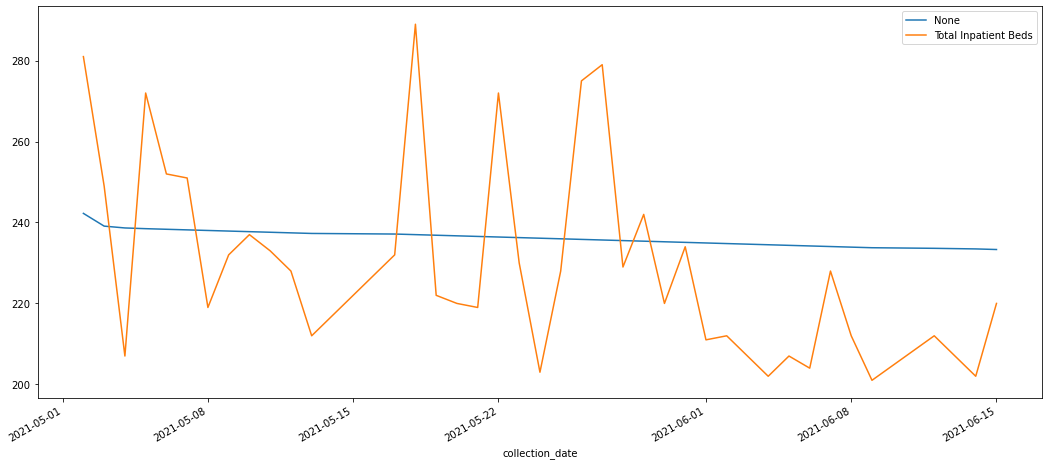

In [75]:
y_pred.plot(legend =True)
Test['Total Inpatient Beds'].plot(legend =True)

In [76]:
Test['Total Inpatient Beds'].mean()

230.3846153846154

In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_pred,Test['Total Inpatient Beds'])
#print(mse)
rmse =sqrt(mse)
print(rmse)
#24.157 This model doesnot deal with the outliers

24.15751173290673


In [78]:
# Custom modeling using the Graphs:


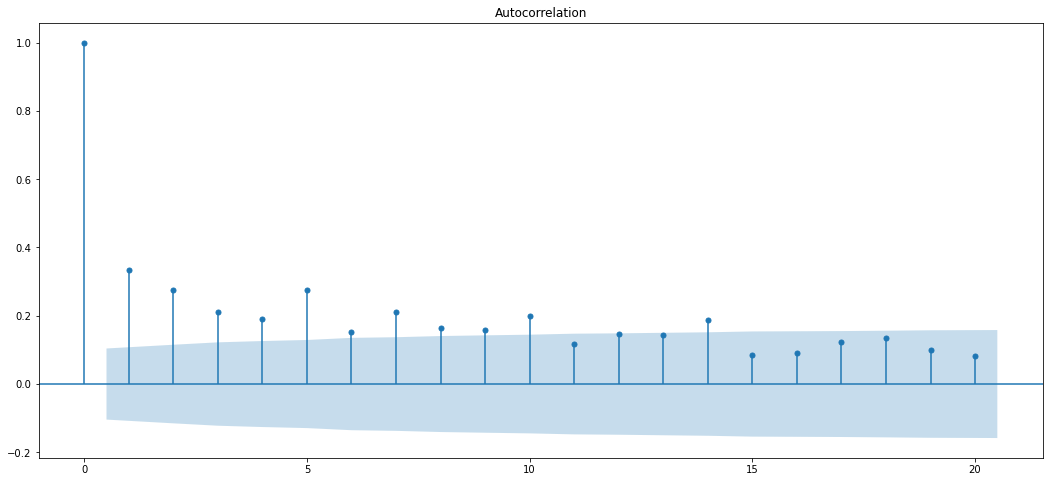

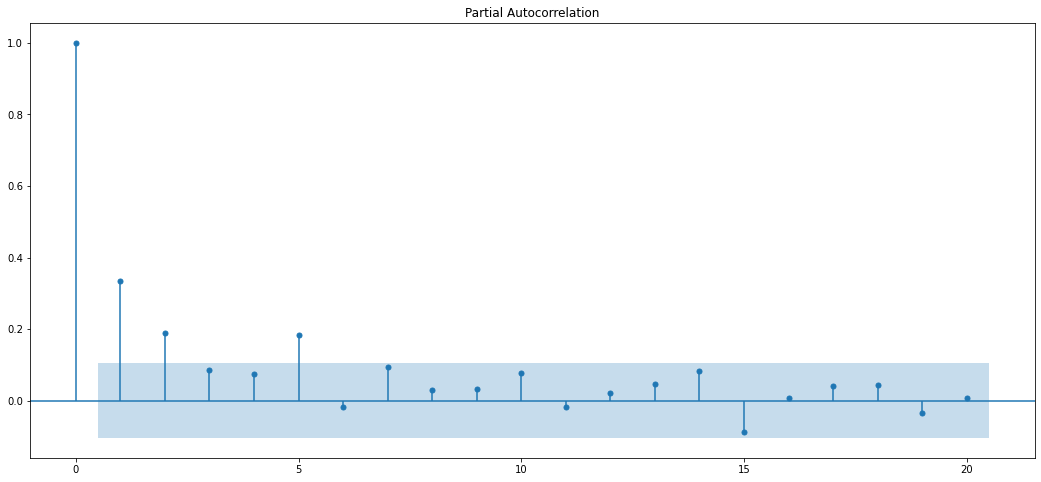

In [79]:
##ACF plots 
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(data['Total Inpatient Beds'],lags=20)
plt.show()

#PACF Plots
from statsmodels.graphics.tsaplots import plot_pacf
#df= pd.read_csv(r"C:\Users\RaviKiran\OneDrive\Desktop\Data Science\Data Sets\daily-minimum-temperatures.csv", header=0, index_col=0)
plot_pacf(data['Total Inpatient Beds'],lags= 20)# -1 to +1
plt.show()

In [80]:
#Custome modeling using the  above graphs
from statsmodels.tsa.arima_model import ARIMA
c_model=ARIMA(Train['Total Inpatient Beds'],order=(4,1,3))
c_model=c_model.fit()

In [81]:
c_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARIMA Model Results                                
==================================================================================
Dep. Variable:     D.Total Inpatient Beds   No. Observations:                  314
Model:                     ARIMA(4, 1, 3)   Log Likelihood               -1454.226
Method:                           css-mle   S.D. of innovations             24.770
Date:                    Tue, 24 Aug 2021   AIC                           2926.452
Time:                            19:23:47   BIC                           2960.197
Sample:                                 1   HQIC                          2939.936
                                                                                  
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.1461      0.136     -1.071      0.284      -0.413       0.121
ar.L1.D.Total Inpatient Beds    -0.9839      0.410     -2.397      0.017      -1.788      -0.179
ar.L2.D.Total Inpatient Beds    -0.2635      0.292     -0.904      0.366      -0.835       0.308
ar.L3.D.Total Inpatient Beds     0.1026      0.132      0.779      0.436      -0.156       0.361
ar.L4.D.Total Inpatient Beds    -0.0683      0.094     -0.729      0.466      -0.252       0.115
ma.L1.D.Total Inpatient Beds     0.1799      0.410      0.439      0.661      -0.623       0.983
ma.L2.D.Total Inpatient Beds    -0.5576      0.176     -3.171      0.002      -0.902      -0.213
ma.L3.D.Total Inpatient Beds    -0.4142      0.305     -1.358      0.175      -1.012       0.184
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0268           -0.6810j            1.2321           -0.4068
AR.2           -1.0268           +0.6810j            1.2321            0.4068
AR.3            1.7775           -2.5453j            3.1045           -0.1530
AR.4            1.7775           +2.5453j            3.1045            0.1530
MA.1            1.0889           -0.0000j            1.0889           -0.0000
MA.2           -1.2175           -0.8572j            1.4890           -0.4024
MA.3           -1.2175           +0.8572j            1.4890            0.4024
-----------------------------------------------------------------------------
"""

In [82]:
start1 =len(Train)
end1 =len(Train)+len(Test) -1
y_pred1 = c_model.predict(start =start1,end =end1,typ ='levels')
y_pred

collection_date
2021-05-02    242.253089
2021-05-03    239.104308
2021-05-04    238.652844
2021-05-05    238.474915
2021-05-06    238.324726
2021-05-07    238.177349
2021-05-08    238.030258
2021-05-09    237.883195
2021-05-10    237.736136
2021-05-11    237.589076
2021-05-12    237.442017
2021-05-13    237.294958
2021-05-17    237.147899
2021-05-18    237.000840
2021-05-19    236.853780
2021-05-20    236.706721
2021-05-21    236.559662
2021-05-22    236.412603
2021-05-23    236.265544
2021-05-24    236.118484
2021-05-25    235.971425
2021-05-26    235.824366
2021-05-27    235.677307
2021-05-28    235.530247
2021-05-29    235.383188
2021-05-30    235.236129
2021-05-31    235.089070
2021-06-01    234.942011
2021-06-02    234.794951
2021-06-03    234.647892
2021-06-04    234.500833
2021-06-05    234.353774
2021-06-06    234.206715
2021-06-07    234.059655
2021-06-08    233.912596
2021-06-09    233.765537
2021-06-12    233.618478
2021-06-14    233.471419
2021-06-15    233.324359
dtype: fl

In [83]:
# again seting the index to its date columns
y_pred1.index =df.index[start1:end1+1]
len(y_pred1)

39

<AxesSubplot:xlabel='collection_date'>

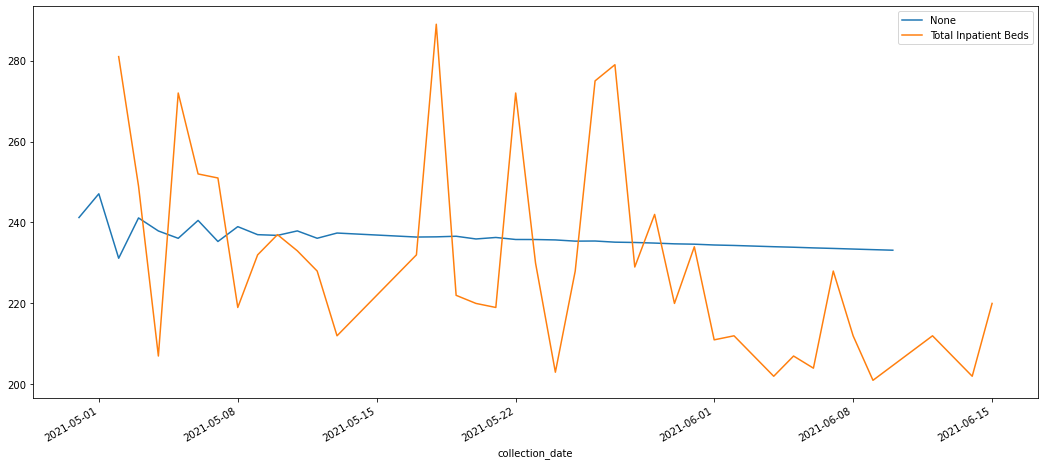

In [84]:
y_pred1.plot(legend =True)
Test['Total Inpatient Beds'].plot(legend =True)

In [85]:
Test['Total Inpatient Beds'].mean()

230.3846153846154

In [86]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_pred1,Test['Total Inpatient Beds'])
#print(mse)
rmse =sqrt(mse)
print(rmse)
#23.852 This model doesnot deal with the outliers

23.852100016158836


In [ ]:
SES and Hats methods


In [87]:
def MAPE(ABC,DEF):
    temp = np.abs((ABC-DEF)/DEF)*100
    return np.mean(temp)

In [88]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.seasonal import seasonal_decompose




start1 =len(Train)
end1 =len(Train)+len(Test) -1



ses_model = SimpleExpSmoothing(Train["Total Inpatient Beds"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = start1,end = end1)
MAPE(pred_ses,Test['Total Inpatient Beds']) 


nan

In [89]:
hw_model = Holt(Train['Total Inpatient Beds']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = start1,end = end1)
MAPE(pred_hw,Test['Total Inpatient Beds']) 

nan